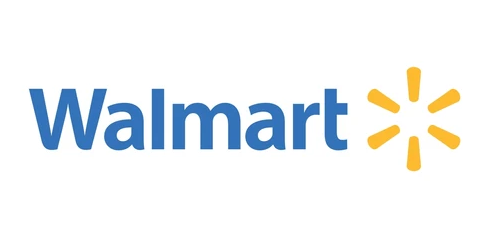

# **Business Case: Walmart - Confidence Interval and CLT**

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [4]:
# converting data into dataf

df = pd.read_csv("walmart_data.csv")

In [5]:
# Top 5 rows of the dataframe

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
# no of rows and column

df.shape

(550068, 10)

In [8]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## Insights

From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.

Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category.

In [9]:
# Checking of null values

df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There are no missing values in the dataset.

In [10]:
# Duplicate values check

df.duplicated().sum()

0

There are no duplicate entries in the dataset

In [11]:
# Uniques values of each columns

df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [16]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


The dataset does not contain any missing values.

In [13]:
# changing data type columns

for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [14]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


## Insights

1. User_ID - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products.

2. Product_ID - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller, with a maximum of 1,880 units sold.

3. Gender - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

4. Age - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future

5. Stay_In_Current_City_Years - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

6. Marital_Status - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers.

In [15]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


## Insights

The purchase amounts vary widely, with the minimum recorded purchase being **"12"** and the maximum reaching "**23961**". The median purchase amount of "**8047**" is notably lower than the mean purchase amount of "**9264**", indicating a right-skewed distribution where a few high-value purchases pull up the mean


# Univariate Analysis

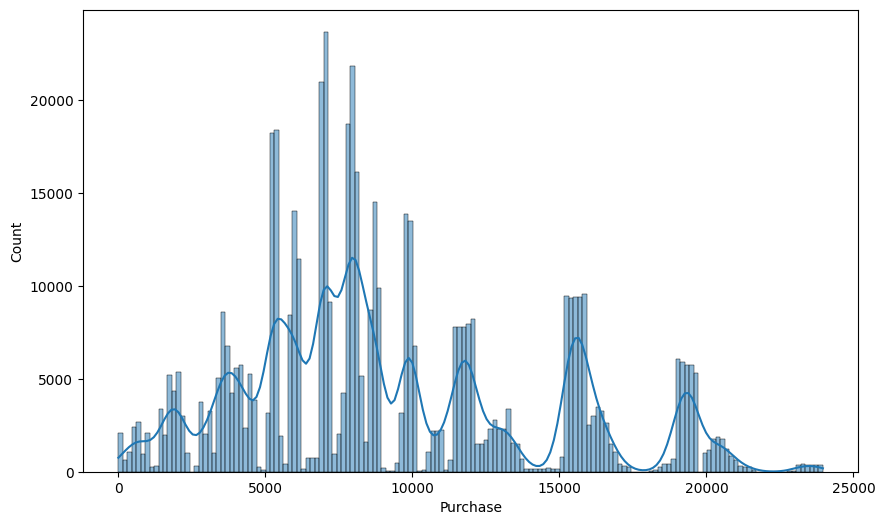

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

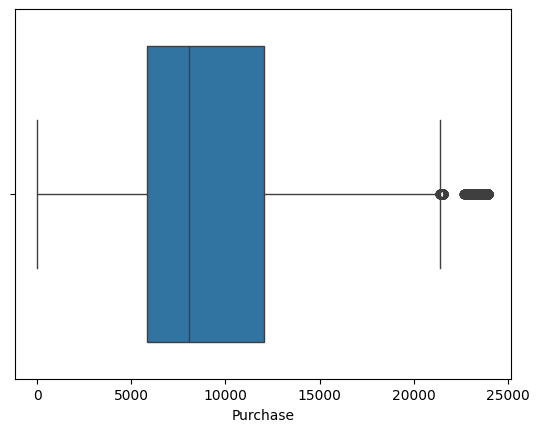

In [19]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

## Insights

Purchase is having outliers

Understanding the distribution of data for the categorical variables
Gender
Age
Occupation
City_Category
Stay_In_Current_City_Years
Marital_Status
Product_Category

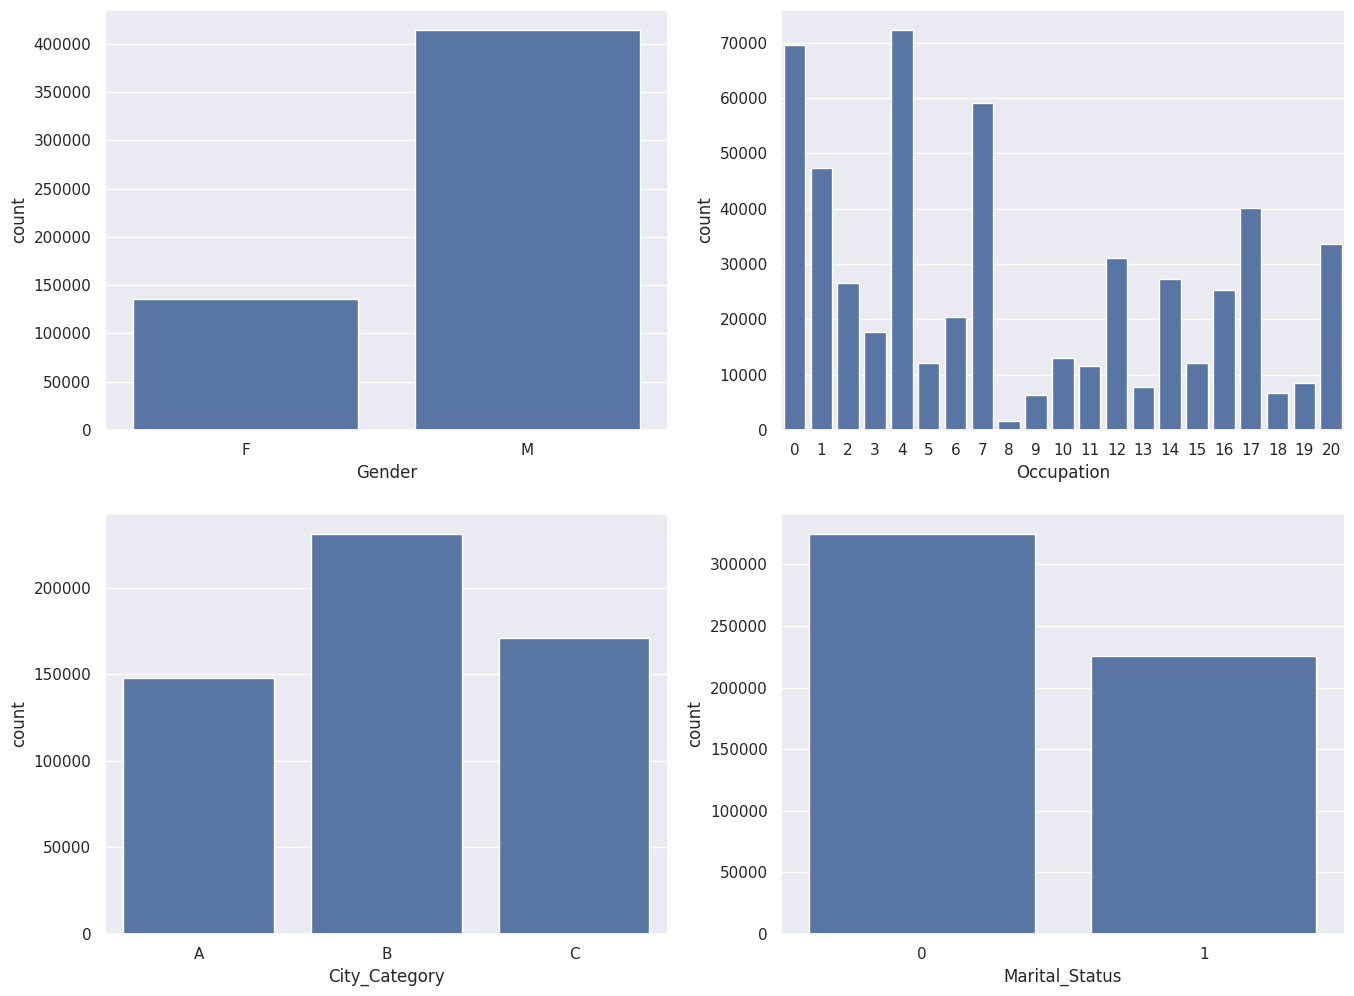

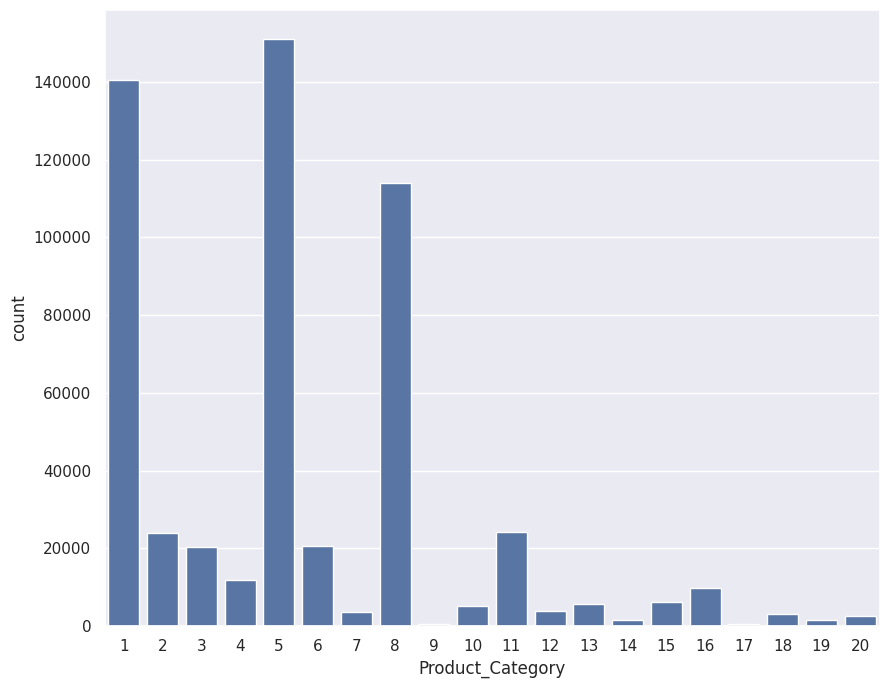

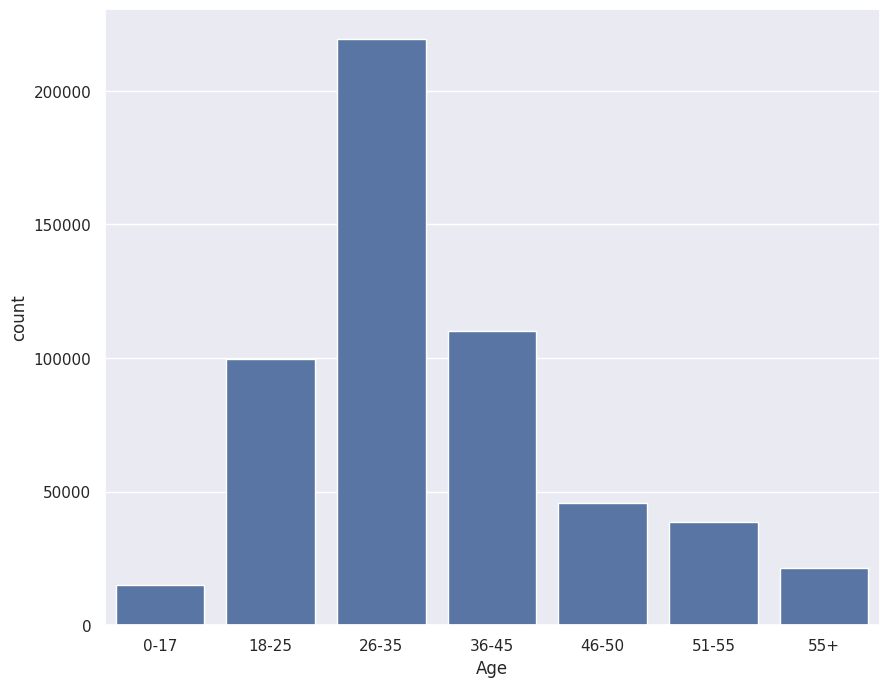

In [25]:
categorical_cols = ['Age','Gender', 'Occupation','City_Category','Marital_Status','Product_Category']
sns.set(style='darkgrid')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Age')

plt.show()

## Insights
- The age group '26-35' has the highest count, indicating that customers in this age range make the most purchases. It is followed by the age groups '36-45' and '18-25'.
- Most of the users are Male
- There are 20 different types of Occupation and Product_Category
- More users belong to B City_Category
- More users are Single as compare to Married
- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

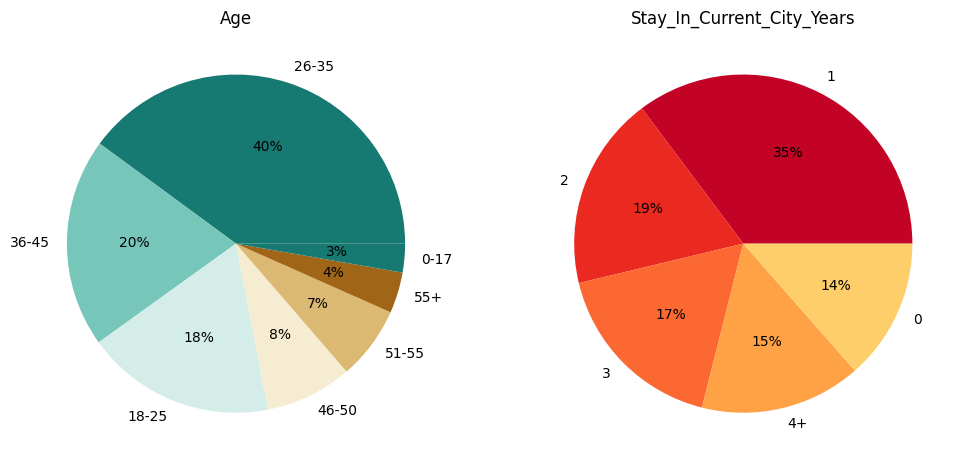

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

# Bivariate Analysis

<ipython-input-27-8c207d598a9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-27-8c207d598a9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-27-8c207d598a9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-27-8c207d598a9a>:9: FutureWarning: 

Passing `palette` without assigni

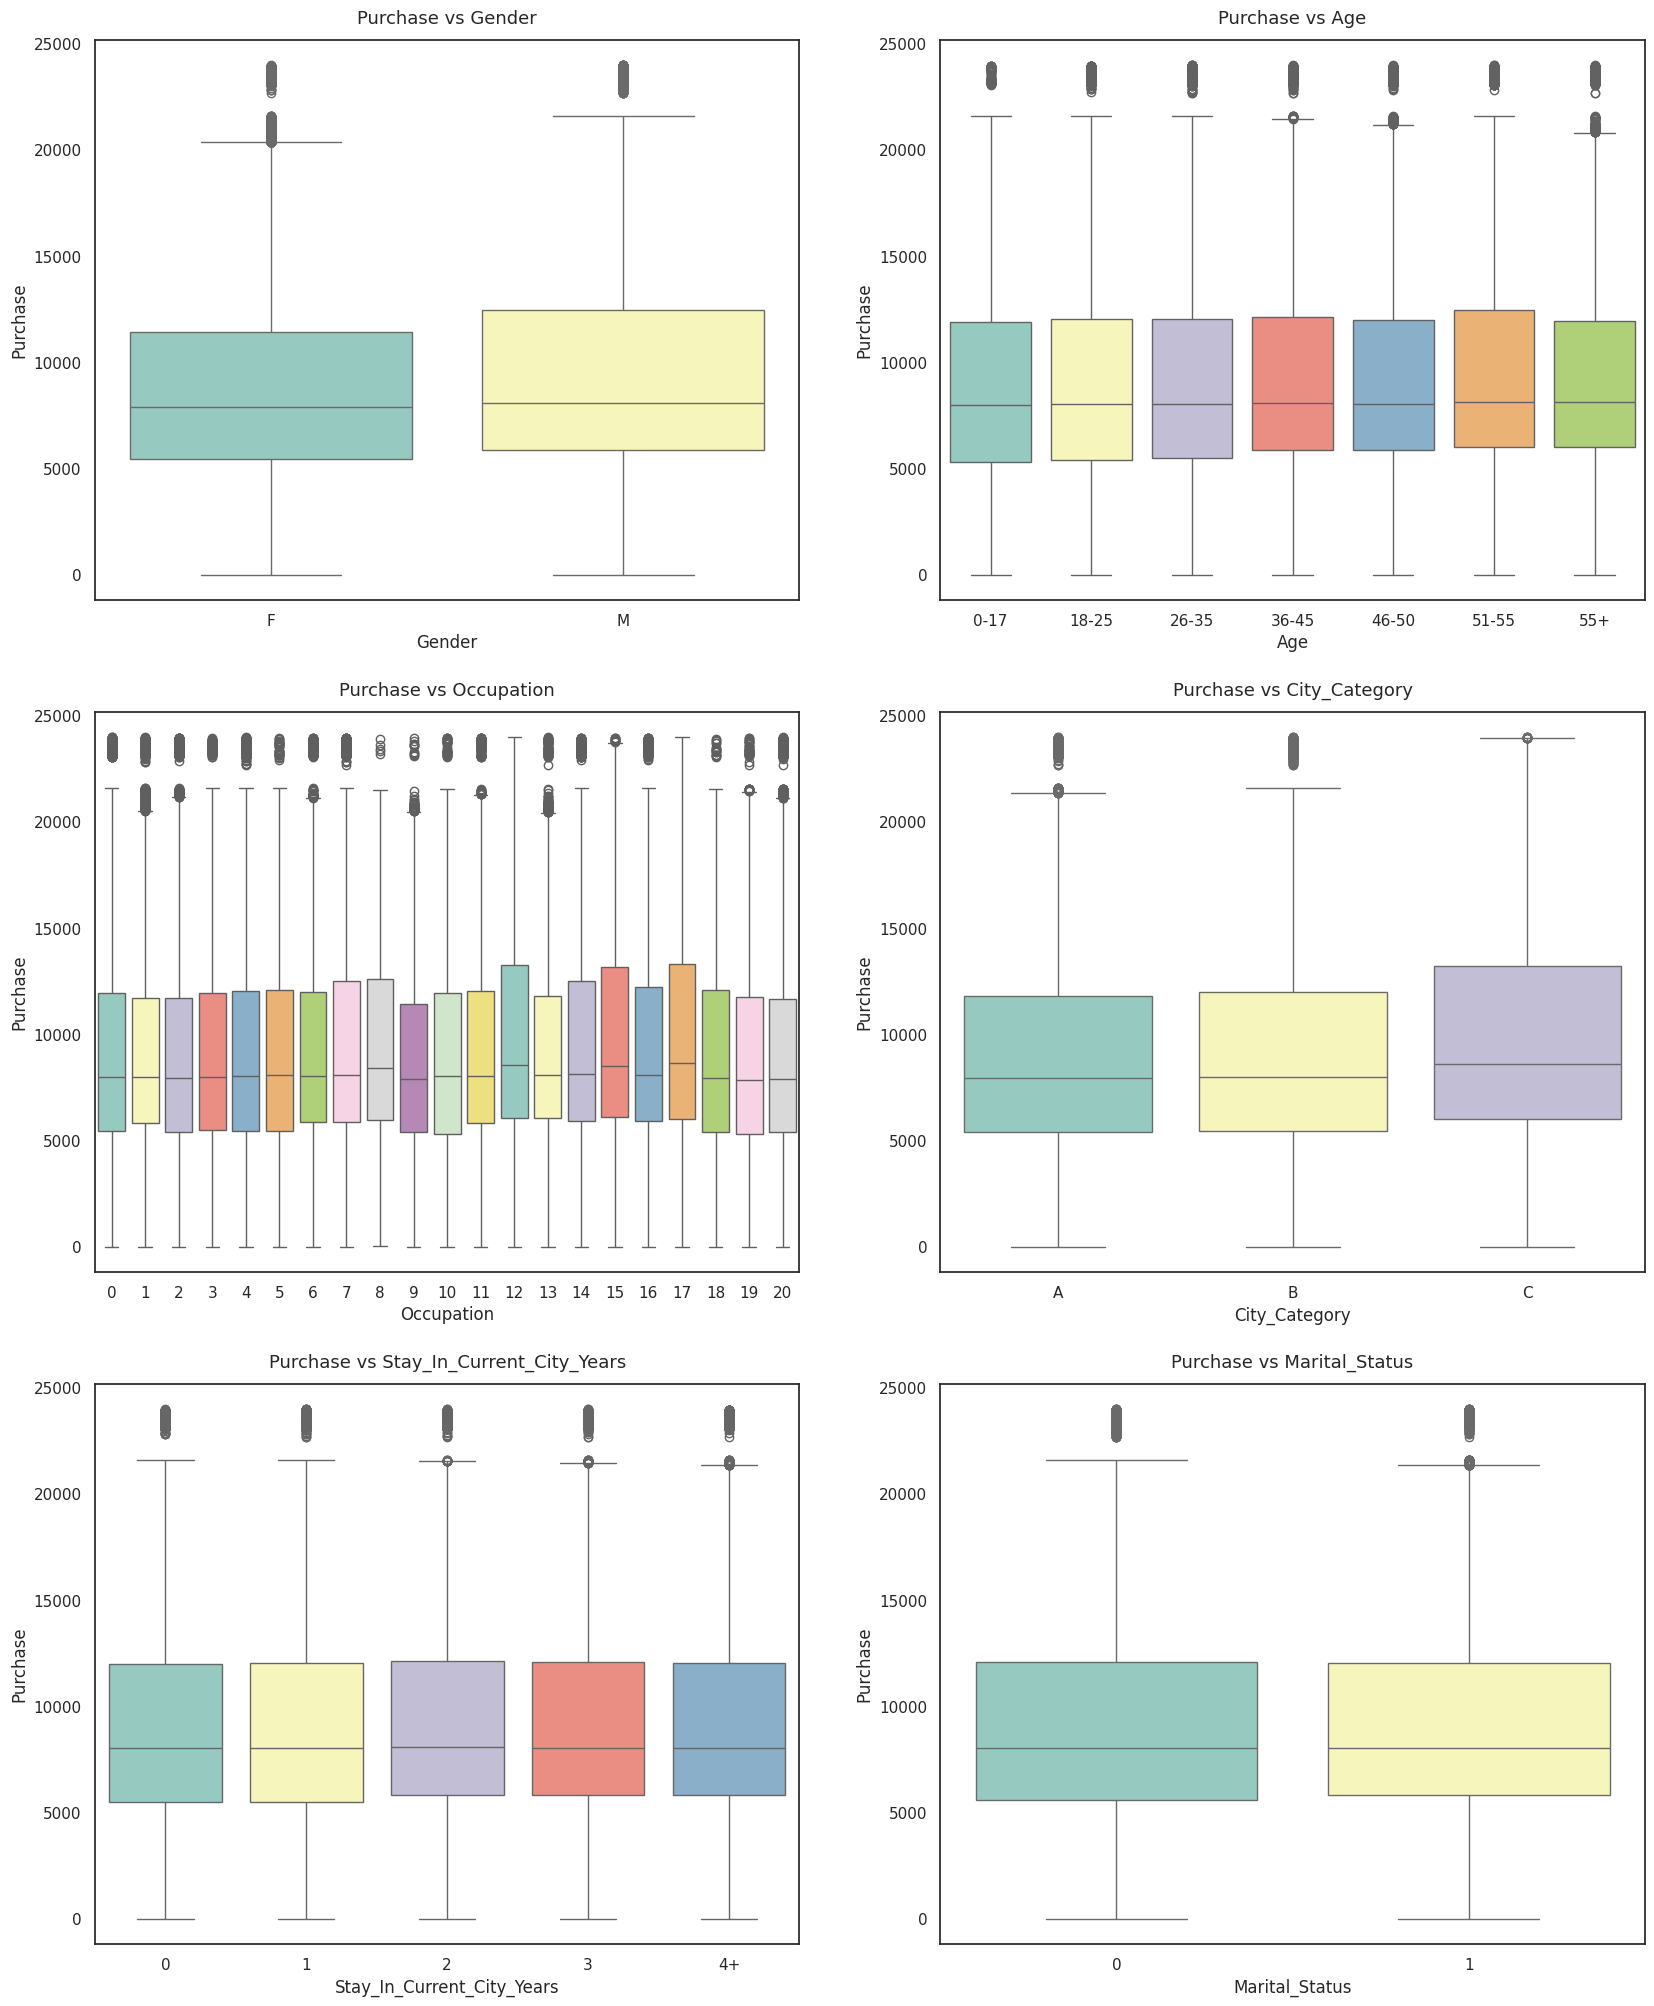

<ipython-input-27-8c207d598a9a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')


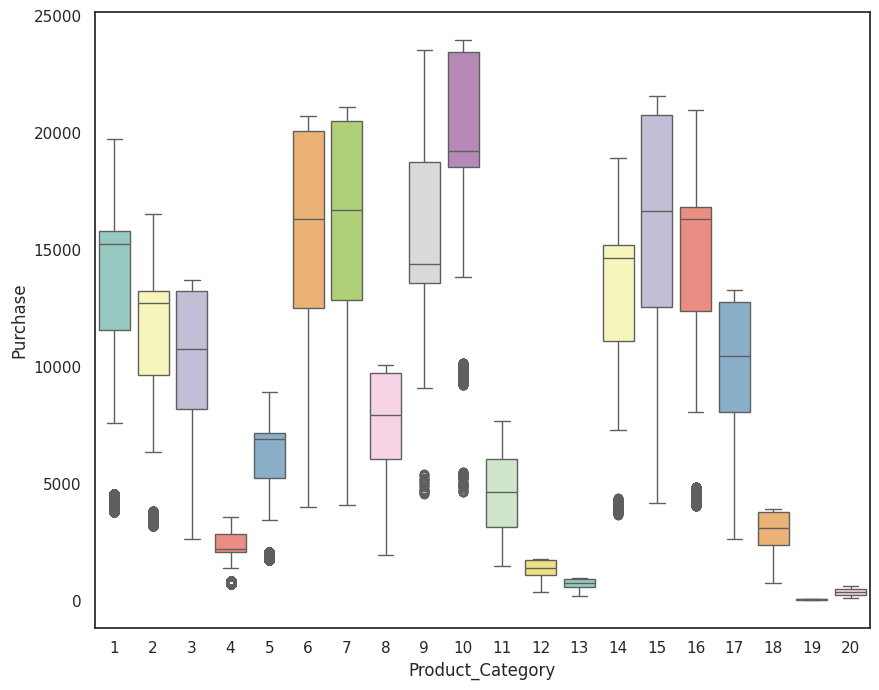

In [27]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

## Insights

**Gender-Related Purchase Analysis:**

Across various age groups, males tend to have higher purchase counts compared to females, with the age group '26-35' showing the most significant difference.

**Occupation-Related Purchase Analysis:**

Occupations '0' and '4' show the highest purchase counts, suggesting that individuals in these occupations contribute significantly to overall sales, with '4' having notably higher purchases than others.

**City Category-Related Purchase Analysis:**

City_Category 'B' has the highest purchase counts for both genders, indicating that customers residing in City_Category 'B' contribute significantly to overall sales compared to 'A' and 'C'.

**Stay in Current City Duration Impact:**

Customers who have stayed in their current city for 1 year exhibit the highest purchase counts, suggesting that individuals with a 1-year residence duration have a higher tendency to make purchases compared to other durations.

**Marital Status-Related Purchase Analysis:**

Individuals with a marital status of 'Single' have higher purchase counts compared to those who are 'Married', indicating that single individuals contribute more to overall sales.

**Product Category-Related Purchase Analysis:**

Product Category '1' has the highest purchase counts, indicating that it significantly contributes to overall sales. Product Categories '5' and '8' also show notable purchase counts.

#Multivariate Analysis

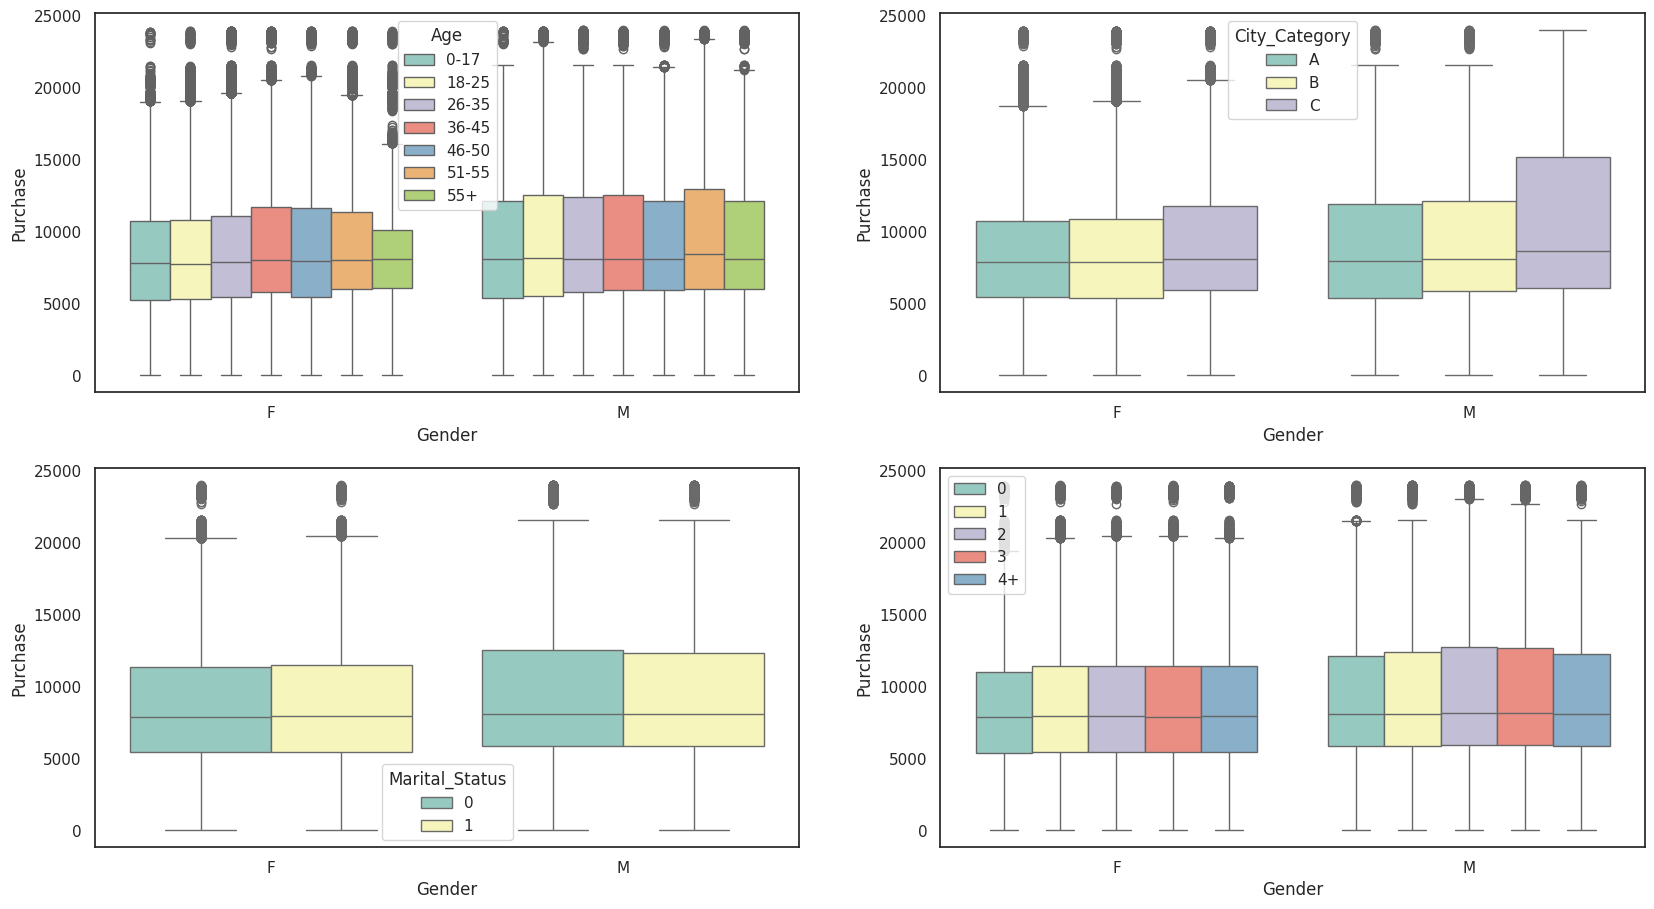

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [29]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


# Average amount spend per customer for Male and Female

In [30]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

<ipython-input-30-9b53a9b20cb5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()


,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000001,M,0
2,1000002,F,0
3,1000002,M,810472
4,1000003,F,0
...,...,...,...
11777,1006038,M,0
11778,1006039,F,590319
11779,1006039,M,0
11780,1006040,F,0


In [32]:

# Gender wise value counts in amt_df
amt_df['Gender'].value_counts()

,count
Gender,
F,5891
M,5891


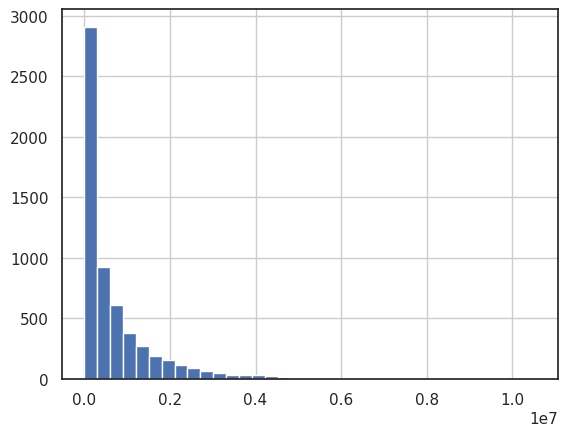

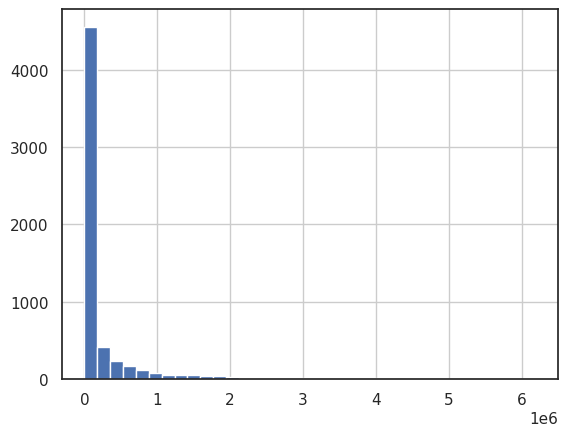

In [33]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [34]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 663653.05
Average amount spend by Female customers: 201363.54


## Insights

Male customers spend more money than female customers

In [35]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [36]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

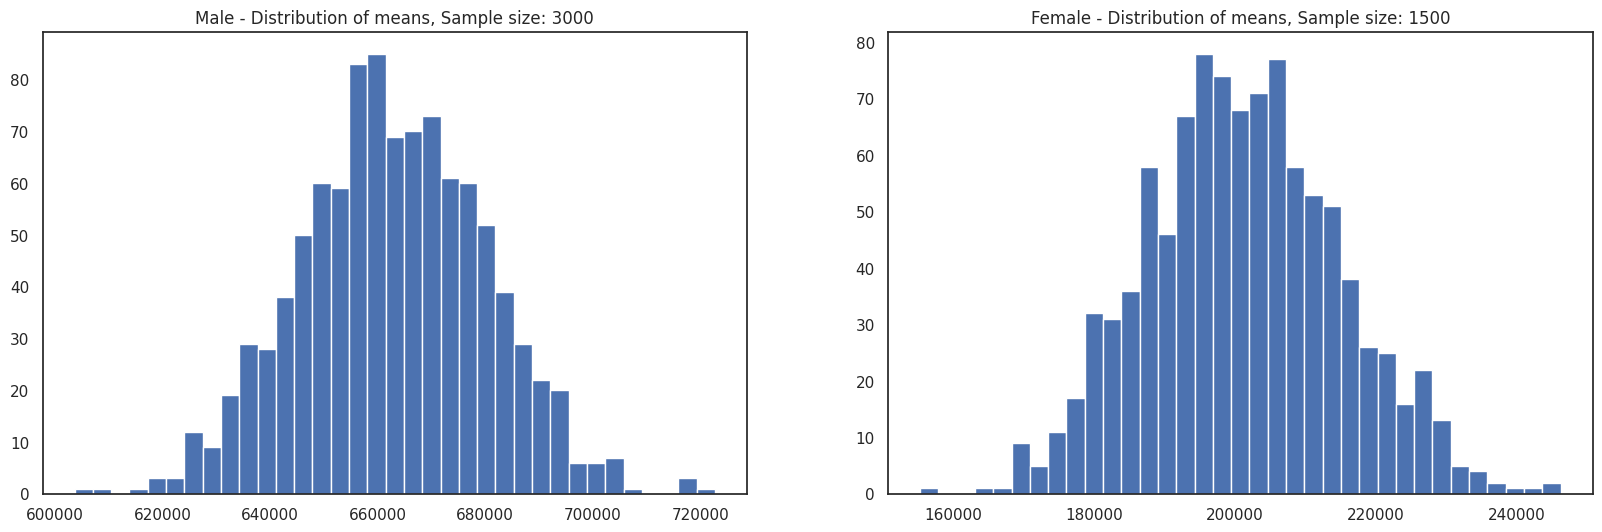

In [37]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [38]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 662863.06
Population mean - Mean of sample means of amount spend for Female: 201077.04

Male - Sample mean: 663653.05 Sample std: 933096.80
Female - Sample mean: 201363.54 Sample std: 535828.17


## Insights

Now using the Central Limit Theorem for the population we can say that:

Average amount spend by male customers is 9,26,341.86
Average amount spend by female customers is 7,11,704.09

# same activity for married vs unmarried

In [39]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000001,M,0
2,1000002,F,0
3,1000002,M,810472
4,1000003,F,0
...,...,...,...
11777,1006038,M,0
11778,1006039,F,590319
11779,1006039,M,0
11780,1006040,F,0


In [40]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

<ipython-input-40-e06e8c54950a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()


,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000001,1,0
2,1000002,0,810472
3,1000002,1,0
4,1000003,0,341635
...,...,...,...
11777,1006038,1,0
11778,1006039,0,0
11779,1006039,1,590319
11780,1006040,0,1653299


In [41]:
amt_df['Marital_Status'].value_counts()

,count
Marital_Status,
0,5891
1,5891


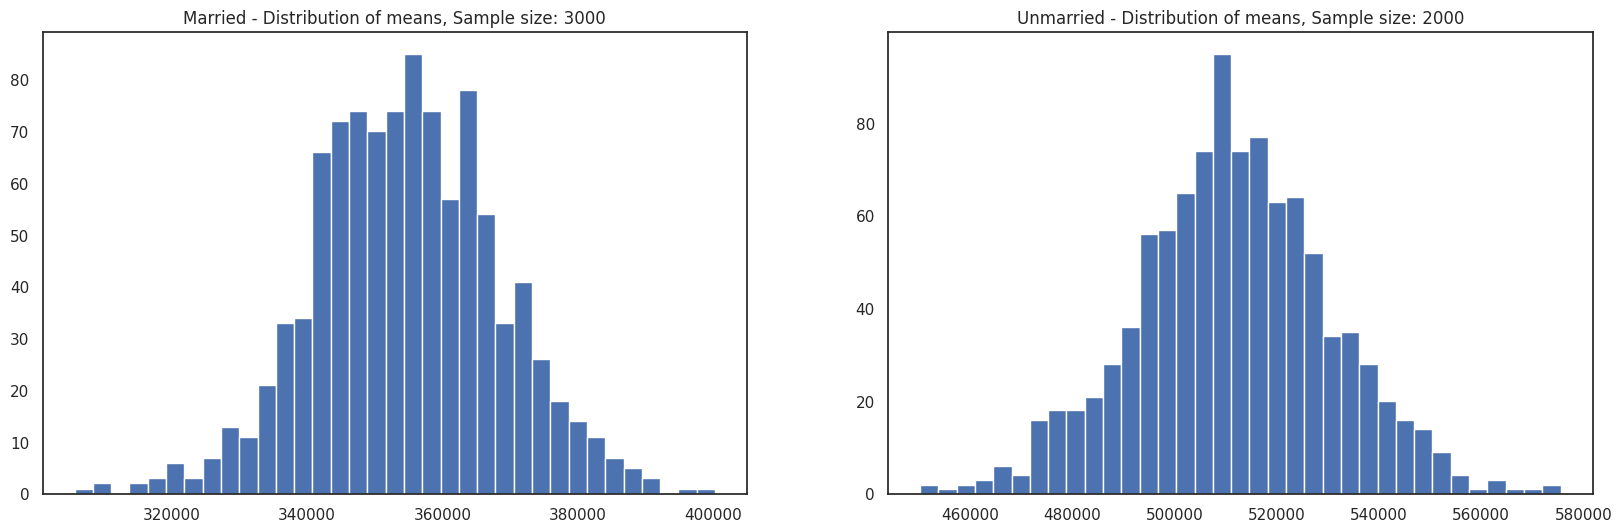

Population mean - Mean of sample means of amount spend for Married: 354647.69
Population mean - Mean of sample means of amount spend for Unmarried: 511422.68

Married - Sample mean: 354249.75 Sample std: 735314.88
Unmarried - Sample mean: 510766.84 Sample std: 843632.94


In [42]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


In [43]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (335472.38, 373027.13)
Unmarried confidence interval of means: (489223.40, 532310.28)


## Insights

Now using the Central Limit Theorem for the population we can say that:

Average amount spend by Married customers is 335472.38
Average amount spend by Unmarried customers is 489223.40

#Calculating the average amount spent by Age

In [44]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

<ipython-input-44-7d39c9607f15>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()


,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000001,18-25,0
2,1000001,26-35,0
3,1000001,36-45,0
4,1000001,46-50,0
...,...,...,...
41232,1006040,26-35,1653299
41233,1006040,36-45,0
41234,1006040,46-50,0
41235,1006040,51-55,0


In [45]:
amt_df['Age'].value_counts()

,count
Age,
0-17,5891
18-25,5891
26-35,5891
36-45,5891
46-50,5891
51-55,5891
55+,5891


In [46]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [47]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (325226.35, 364561.66)
For age 36-45 --> confidence interval of means: (159958.40, 188563.04)
For age 18-25 --> confidence interval of means: (142318.86, 167933.62)
For age 46-50 --> confidence interval of means: (62258.26, 80618.47)
For age 51-55 --> confidence interval of means: (54450.95, 70179.72)
For age 55+ --> confidence interval of means: (28893.83, 39266.89)
For age 0-17 --> confidence interval of means: (18402.36, 27400.79)


## Insights

**Confidence Interval by Age**

For age 26-35 --> confidence interval of means: (325226.35, 364561.66)

For age 36-45 --> confidence interval of means: (159958.40, 188563.04)

For age 18-25 --> confidence interval of means: (142318.86, 167933.62)

For age 46-50 --> confidence interval of means: (62258.26, 80618.47)

For age 51-55 --> confidence interval of means: (54450.95, 70179.72)

For age 55+ --> confidence interval of means: (28893.83, 39266.89)

For age 0-17 --> confidence interval of means: (18402.36, 27400.79)

# Recommendation


1.Target Male Shoppers

Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.
2. Focus on 26 - 45 Age Group

With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.
3. Engage Younger Shoppers

Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.
4. Customer Segmentation

Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

5. Enhance the 51 - 55 Age Group Shopping Experience

Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.